# **Les aventuriers des Axes Perdus**
#Epoch 2

***Olivier Thöni*** *(novice en IA, et sinon... professeur de mathématiques)*

*School of AI - Le Mans*

Lien vers le présent NoteBook : https://frama.link/OT_dimension2   





# **1. Diminuer la dimensionnalité**

## **1.1.la régression linéaire**

https://frama.link/OT_dimensions 


## **1.2. L' "Analyse en Composantes Principales" (ACP)**


![ACP](https://drive.google.com/uc?id=1Ha2-PZQkoQghBFH13R0gCyr57h2c5AsE)
### **1.2.a/ la classification des iris**

https://frama.link/OT_dimension2 

Pour que les choses restent visibles : commençons par passer de 3 à 2 dimensions, avec ce grand classique des *data sets*.

![Iris](https://drive.google.com/uc?id=1eIZvGr1rIH-Af9AtnLzOY7rmO05oyGpZ)

Il s'agit d'un jeu de données, directement accessible dans le module **Scikit Learn**, au format *txt* ou ici, au format csv :


https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data 

**Récupération des données**


Récupérons-le et transformons-le en DataFrame **Pandas**.

Pour les 150 "individus" du jeu de données, on mesure la longueur du sépale, la largeur du sépale, la longueur du pétale et la largeur du pétale, et enfin, on indique son espèce (qui sera l'objet des prédictions).

In [1]:
import matplotlib.pyplot as plt

import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'classe']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.iat[3,2]

1.5

In [3]:
df.loc[2]

sepal_len            4.7
sepal_wid            3.2
petal_len            1.3
petal_wid            0.2
classe       Iris-setosa
Name: 2, dtype: object

In [4]:
m = len(df)
m

150

Séparons données et classes à prédire

In [5]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values # données mesurées, "iloc" : localisation indexée
y = df.iloc[:,4].values # espèce de l'iris

Nous affichons la dimension de la matrice, nous récupérons le nombre d’observations (n =
150) et de variables (p = 3), enfin nous affichons les valeurs-mêmes.


In [6]:
#dimension
print(X.shape) 
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
#affichage des données
print(X)


(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

**Visualisation**

Visualisons le nuage dans le plan de deux des variables...
Pour le fun !

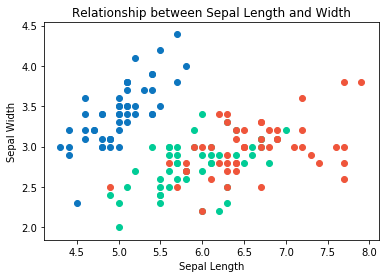

In [7]:
fig, ax = plt.subplots()

colors = {'Iris-setosa':'#0D76BF', 'Iris-versicolor':'#00cc96', 'Iris-virginica':'#EF553B'}

        
for Swidth, Slength, Specie in zip(df['sepal_wid'], df['sepal_len'], df['classe']):
    plt.scatter(x=Slength, y=Swidth, color=colors[Specie])

ax.set(xlabel="Sepal Length",
       ylabel="Sepal Width",
      title="Relationship between Sepal Length and Width")

plt.show()

Pour visualiser l'ensemble du nuage à quatre dimensions, on n'a d'autre recours que de visualiser dans les plans de deux dimensions.
Voici toutes ces vues...

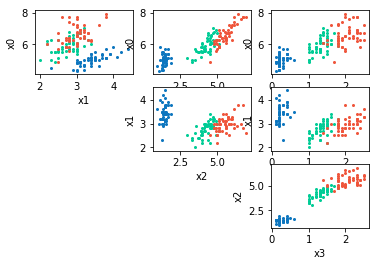

In [8]:
colors = {'Iris-setosa':'#0D76BF', 'Iris-versicolor':'#00cc96', 'Iris-virginica':'#EF553B'}
for i in range(4) :
    for j in range(0,i) :
        plt.subplot(3,3,(i)+3*(j))
        
        for vi,vj,specie in zip(df.iloc[:,i],df.iloc[:,j],df.iloc[:,4]) :
            plt.scatter(x=vi,y=vj,color = colors[specie], s=4)
        
        plt.xlabel('x'+str(i))
        plt.ylabel('x'+str(j))
        #pd.scatter_matrix marcherait aussi, voir pour les couleurs...)

plt.show()




Bon... j'ai un peu galéré, mais je suis content du résultat...
On voit clairement qu'une espèce est clairement séparée des deux autres.


Pour que la visualisation soit possible, et afin de donner du sens à la **réduction de dimensions** par **Analyse en Composantes Principales**, oublions la 1ère dimension et travaillons sur les trois autres.

In [9]:
X = df.iloc[:,1:4].values # données mesurées
#X

**Visualisation du nuage à 3 dimensions**

<IPython.core.display.Javascript object>


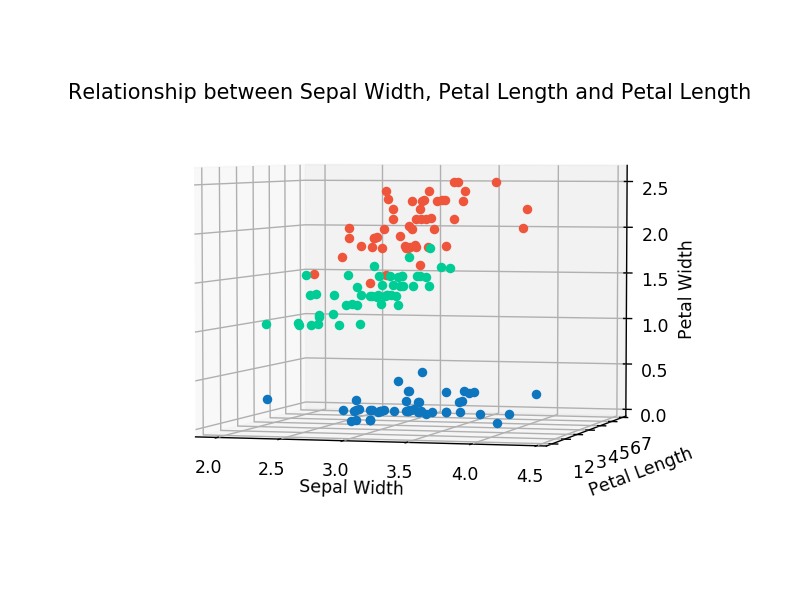

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =X[:,0]
y =X[:,1]
z =X[:,2]
colors = {'Iris-setosa':'#0D76BF', 'Iris-versicolor':'#00cc96', 'Iris-virginica':'#EF553B'}
for xx,yy,zz,specie in zip(x,y,z,df.iloc[:,4]) :
    ax.scatter(xx,yy,zz, color = colors[specie], marker = 'o')

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')

ax.set_title("Relationship between Sepal Width, Petal Length and Petal Length")
plt.show()


**Normalisation**

Avant tout travail de réduction de la dimensionnalité, il faut **normaliser** les données, c'est-à-dire les **centrer** (leur soustraire leur moyenne) et les **réduire** (diviser par leur écart-type)

<IPython.core.display.Javascript object>


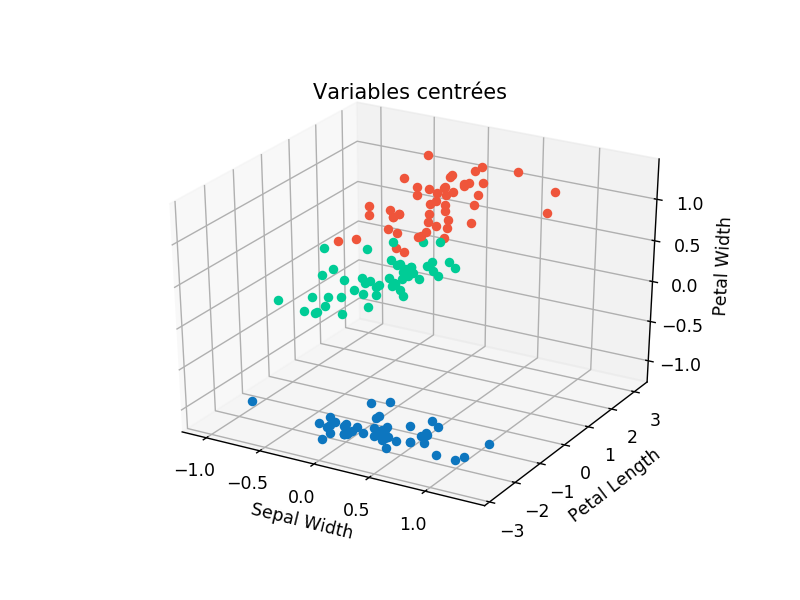

In [11]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def centrage(s):
    return s - np.mean(s)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_centree = centrage(x)
y_centree = centrage(y)
z_centree = centrage(z)

colors = {'Iris-setosa':'#0D76BF', 'Iris-versicolor':'#00cc96', 'Iris-virginica':'#EF553B'}
for xx,yy,zz,specie in zip(x_centree,y_centree,z_centree,df.iloc[:,4]) :
    ax.scatter(xx,yy,zz, color = colors[specie], marker = 'o')

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')

ax.set_title("Variables centrées")
plt.show()

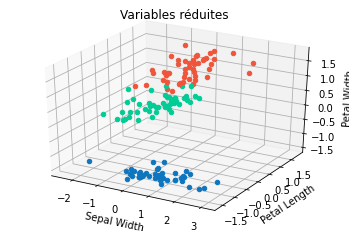

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def reduire(s):
    return centrage(s) / np.std(s)

x_reduite = reduire(x)
y_reduite = reduire(y)
z_reduite = reduire(z)

colors = {'Iris-setosa':'#0D76BF', 'Iris-versicolor':'#00cc96', 'Iris-virginica':'#EF553B'}
for xx,yy,zz,specie in zip(x_reduite,y_reduite,z_reduite,df.iloc[:,4]) :
    ax.scatter(xx,yy,zz, color = colors[specie], marker = 'o')

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal Width')

ax.set_title("Variables réduites")
plt.show()

Les trois figures sont les mêmes... à l'échelle des axes près !

Vu en 3D animé, voici notre nuage de points...

![Iris 3D animé…](https://github.com/njanakiev/blender-scripting/blob/master/img/fisher_iris_visualization.gif?raw=true)

L'ACP va consister à trouver l'axe de perspective dans lequel le nuage sera le plus dispersé, et ceci étant fait, le 2ème axe après ce premier (il est perpendiculaire au premier)


***Remarque :***
Le module *ScikitLearn* comprend une commande, *StandardScaler*, permettant la normalisation (standardisation) en une ligne... une fois qu'on a compris les paragraphes précédents...

In [12]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[ 1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [ 3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [ 1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [ 1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [ 1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [ 8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [ 8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [ 1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [ 1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [ 8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [ 2.18907205e+00 -1.45500381e+00 -1.31297673e+00]
 [ 3.11468391e+00 -1.28440670e+00 -1.05003079e+00]
 [ 1.95766909e+00 -1.39813811e+00 -1.05003079e+00]
 [ 1.03205722e+00 -1.34127240e+00 -1.18150376e+00]
 [ 1.72626612e+00 -1.17067529e+00 -1.18150376e+00]
 [ 1.72626612e+00 -1.28440670e+



### **ACP et aide à l'interprétation**

*inspiration : http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_ACP_Python.pdf*

L' "Analyse en composante Principale" consiste à tenter d'observer le nuage de points sous un angle (ici projection sur un plan, donc déterminé par deux vecteurs) où la dispersion est la plus importante, afin de faire apparaître au mieux les clusters.
On cherche pour cela des tendances dans le nuage, ce sont les vecteurs propres de la matrice de corrélations qui déterminent ces tendances : les valeurs propres associées indiquent la part que prend chaque tendance dans la variance totale du nuage.
Pour passer de 3 à deux dimensions, il s'agit donc de trouver les deux vecteurs propres associés aux deux plus fortes valeurs propres.

Le fait que nos données soient étiquetées, ici, permettra de donner du sens aux tendances dégagées.


**Matrice des corrélations**

( covariances divisées par le produit des écarts-types)

In [13]:
df3var = df.iloc[:,1:4]
df_mat_corr = df3var.corr()
df_mat_corr

,sepal_wid,petal_len,petal_wid
sepal_wid,1.000000,-0.420516,-0.356544
petal_len,-0.420516,1.000000,0.962757
petal_wid,-0.356544,0.962757,1.000000


Longueur et largeur du pétale sont très positivement corrélées et suffiraient à classifier nos iris

**visualisation en couleur de la matrice des corrélations**

<IPython.core.display.Javascript object>


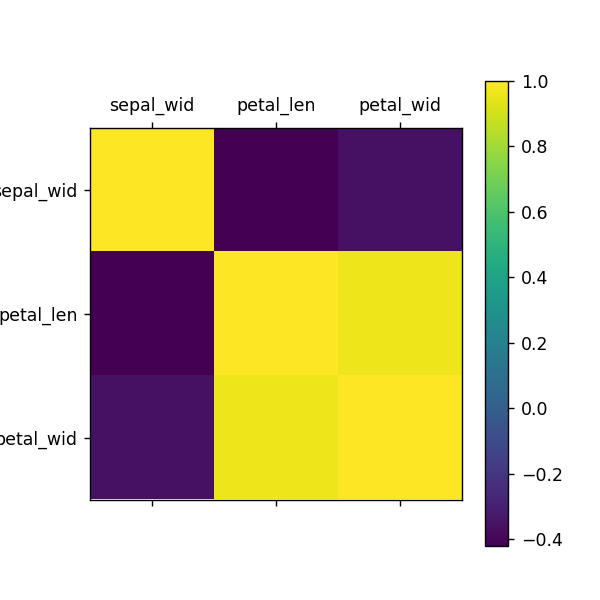

In [14]:
plt.matshow(df3var.corr())
plt.xticks(range(len(df3var.columns)), df3var.columns)
plt.yticks(range(len(df3var.columns)), df3var.columns)
plt.colorbar()
plt.show()


**Valeurs propres et vecteurs propres de la matrice de corrélation :**

ça marche avec simplement Numpy :

In [15]:
import numpy as np
np_mat_corr = np.array(df_mat_corr) # On retype le Dataframe Pandas en Array de Numpy
np_mat_corr

array([[ 1.        , -0.4205161 , -0.35654409],
       [-0.4205161 ,  1.        ,  0.9627571 ],
       [-0.35654409,  0.9627571 ,  1.        ]])

In [16]:
np.linalg.eig(np_mat_corr)

(array([2.2120434 , 0.75324395, 0.03471265]),
 array([[ 0.41314159, -0.90895312, -0.05584127],
        [-0.64998631, -0.25137587, -0.71716663],
        [-0.6378337 , -0.33258742,  0.69466091]]))

On obtient les trois valeurs propres (*Eingen Value in english*) et les vecteurs-colonnes propres associés.



---



On peut aussi fort bien faire faire le même travail à *ScikitLearn* , en travaillant directement sur les valeurs de notre tableau Z, des données normalisées :

On importe l'objet PCA du module *ScikitLearn*.*decomposition* et on l'instancie :

In [17]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation
acp = PCA(svd_solver='full')
# Le paramètre svd_solver placé à "Full" indique que
# l'on va travailler sur la totalité des données, vu qu'elles sont peu nombreuses.

Nous pouvons lancer les traitements : la fonction ***fit_transform()***
renvoie en sortie les coordonnées factorielles F<sub>ik</sub> que nous collectons dans la variable *coord*

In [18]:
#calculs
coord = acp.fit_transform(Z)

La propriété ***.explained_variance_*** semble faire l’affaire pour obtenir les variances (valeurs propres, λ<sub>k</sub>) associées aux axes factoriels.

Il est nécessaire de débiaiser les variances expérimentales par le coefficient (n-1)/n

In [19]:
#valeurs propres corrigées
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[2.2120434  0.75324395 0.03471265]


Youpi, les mêmes que ci-dessus !!!

PCA fournit également les proportions de variance associées aux axes :


In [20]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.7373478  0.25108132 0.01157088]


C'est là que commence l'analyse des résultats !!!

La 1<sup>ère</sup> composante accapare 73,73% de l'information disponible.
Avec la 2<sup>ème</sup>, on arrive à 73,73 + 25,10 = 98,83% de l'information globale ! La dernière semble anecdotique.

Confirmons cela par l' **"éboulis des valeurs propres"** (*Scree Plot*)

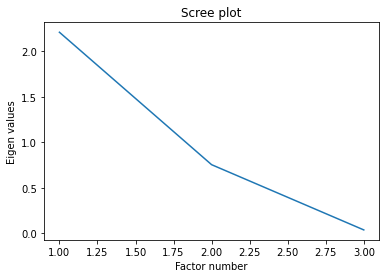

In [0]:
#scree plot
plt.plot(np.arange(1,4),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()


... ou par la courbe de cumul de variance restituée selon le nombre de facteurs : courbe ***ROC*** (*Receiving Operator Characteristic*) qui est communément utilisée pour mesurer la performance d'un classifieur.

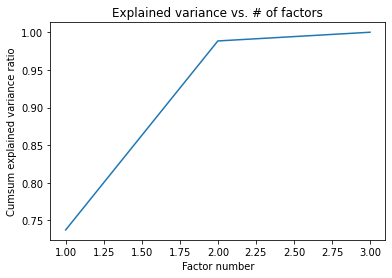

In [0]:
#cumul de variance expliquée
plt.plot(np.arange(1,4),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

Dans les deux cas les "coudes" (cassures) indiquent le nombre de facteurs à retenir.



---

Il existe deux outils pour une interprétation facile de l'ACP :
* la représentation des individus dans le plan factoriel
* la projection des variables dans le plan factoriel.

**Représentation des individus : coordonnées factorielles**

Les coordonnées factorielles (F<sub>ik</sub>) des individus ont été
collectées dans la variable *coord*. Nous les positionnons dans le premier plan factoriel avec leurs labels pour situer et comprendre les proximités entre les iris.
Deux commentaires au préalable :
1. L’ajout d’une étiquette dans un graphique nuage de points n’est pas très pratique sous Python (librairie Matplotlib), ma solution a le mérite de fonctionner, il y a plus simple avec la bibliothèque *Seaborn*.
2. Les outils graphiques calculent souvent automatiquement les échelles en fonction des plages de valeurs. Ce n’est pas une bonne idée en ce qui concerne l’ACP. En effet, les axes n’ont pas la même importance (% de variance restituée). Pour ne pas fausser la perception des proximités, il est très important de veiller à ce que les échelles soient identiques en abscisses et en ordonnées. Respecter cette règle nous dispense de faire afficher les pourcentages de variance portés par les axes. 




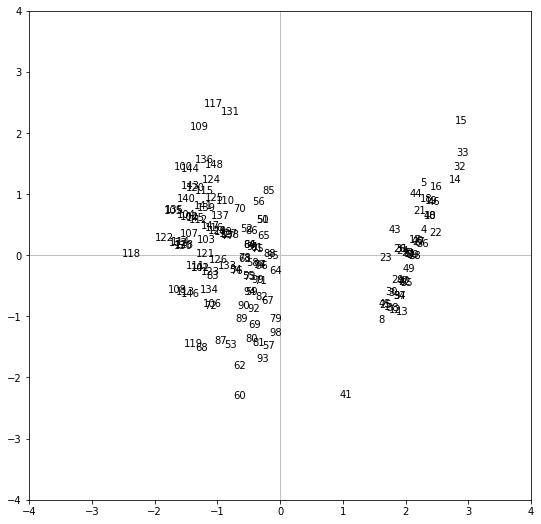

In [0]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(9,9))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-4,4) #et en ordonnée

#placement des étiquettes des observations

for i in range(n):
    plt.annotate(df.index[i],(coord[i,0],coord[i,1]))
    
#ajouter les axes
plt.plot([-4,4],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-4,4],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

Et si nous ajoutions quelques couleurs en fonctions de nos espèces, qui sont connues...

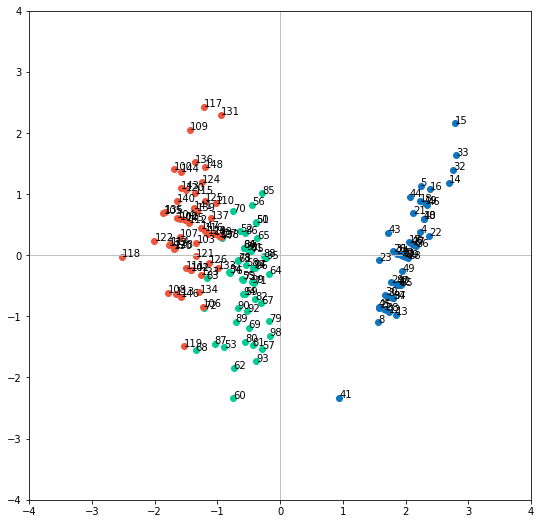

In [0]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(9,9))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-4,4) #et en ordonnée

#placement des étiquettes des observations
colors = {'Iris-setosa':'#0D76BF', 'Iris-versicolor':'#00cc96', 'Iris-virginica':'#EF553B'}
for i,Specie in zip(range(n), df['classe']):
    plt.annotate(df.index[i],(coord[i,0],coord[i,1]))
    plt.scatter(x=coord[i,0], y=coord[i,1], color=colors[Specie])

#ajouter les axes
plt.plot([-4,4],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-4,4],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

Yes !!!

Comme nos données étaient étiquetées (ce qui n'est pas une obligation), nous avons pu colorer selon les espèces, et nous constatons que nous avons plutôt bien réussi à séparer les clusters.
Ainsi, si d'autres individus se présentent, en les projetant également sur notre plan factoriel, nous serons en mesure de les classifier !

**Qualité de la représentation des individus dans le plan factoriel : les Cos² (cosinus carrés)**

Pour calculer la qualité de représentation des individus sur les axes, nous devons d’abord calculer les carrés des distances à l’origine des individus, qui correspondent également à leur contribution dans l’inertie totale.

In [0]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':df.index,'d_i':di}))

      ID       d_i
0      0  4.588062
1      1  3.538534
2      2  3.792840
3      3  3.384939
4      4  5.119251
..   ...       ...
145  145  2.783974
146  146  2.991940
147  147  1.797338
148  148  3.608776
149  149  1.222449

[150 rows x 2 columns]


In [0]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(3):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

      id    COS2_1    COS2_2
0      0  0.994107  0.005880
1      1  0.776532  0.222556
2      2  0.937630  0.061012
3      3  0.870217  0.129780
4      4  0.972507  0.027409
..   ...       ...       ...
145  145  0.816759  0.118358
146  146  0.830767  0.155068
147  147  0.878198  0.109113
148  148  0.398655  0.577758
149  149  0.904755  0.095177

[150 rows x 3 columns]


In [0]:
#contributions aux axes
ctr = coord**2
for j in range(3):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

      id     CTR_1     CTR_2
0      0  0.013746  0.000239
1      1  0.008281  0.006970
2      2  0.010718  0.002048
3      3  0.008878  0.003888
4      4  0.015004  0.001242
..   ...       ...       ...
145  145  0.006853  0.002916
146  146  0.007491  0.004106
147  147  0.004757  0.001736
148  148  0.004336  0.018453
149  149  0.003333  0.001030

[150 rows x 3 columns]


**Représentation des variables : 2<sup>ème</sup> outil pour l'interprétation de l'ACP**

Nous avons besoin des vecteurs propres pour l’analyse des variables. Ils sont fournis par le champ **.components_**





In [0]:
#le champ components_ de l'objet ACP
print(acp.components_)


[[ 0.41314159 -0.64998631 -0.6378337 ]
 [ 0.90895312  0.25137587  0.33258742]
 [-0.05584127 -0.71716663  0.69466091]]


*Note : les facteurs sont en ligne, les variables en colonne, nous devons en tenir compte pour obtenir les corrélations (variables x facteurs, 𝑟<sub>𝑗𝑘</sub>) en les multipliant par la racine carrée des valeurs propres :*

In [0]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((3,3))
for k in range(3):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)


[[ 0.61446301  0.78887703 -0.01040397]
 [-0.96672072  0.21816818 -0.13361769]
 [-0.94864622  0.28865139  0.12942458]]


Les variables sont maintenant en ligne, les facteurs en colonne.

Si l’on s’en tient spécifiquement aux deux premiers facteurs :

In [0]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

      COR_1     COR_2
0  0.614463  0.788877
1 -0.966721  0.218168
2 -0.948646  0.288651


Ainsi, la 1<sup>ère</sup> variable(largeur du sépale) intervient assez fortement et positivement sur les deux axes factoriels, tandis que les deux autres (longueur et largeur du pétale), très fortement négativement sur le 1<sup>er</sup> axe et de manière légèrement positive sur le 2<sup>nd</sup>. Ces deux dernières sont très proches l'une de l'autre, comme on le pressentait déjà dans la matrice des corrélations.



---

Nous pouvons dessiner maintenant le cercle des corrélations :



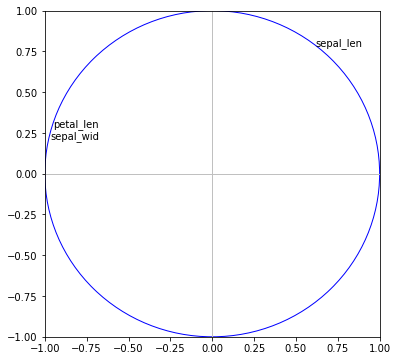

In [0]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(6,6))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(3):
 plt.annotate(df.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

### **1.2.b/ Les décathloniens**


https://www.kaggle.com/capedcrusader/pca-on-a-random-dataset/notebook (en R)


### **1.2.c/ Un usage d'une ACP simplifiée : la SVD pour la compression d'image**

https://frama.link/OT_dimension3




## **1.3. "Réseau de Neurones Convolutionnel" (CNN)**

https://frama.link/OT_dimension4


# **2. Récupérer l'information perdue : "AutoEncoder"**

https://frama.link/OT_dimension5 